### testing
### the project begins with an indication, after many testing cells

In [67]:
import numpy as np
import matplotlib.pyplot as plt

data1 = np.loadtxt('atom_position_1.txt')

x1 = data1[:,2]
y1 = data1[:,3]

data5 = np.loadtxt('atom_position_5.txt')

x5 = data5[:,2]
y5 = data5[:,3]

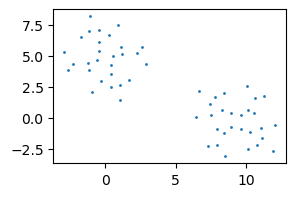

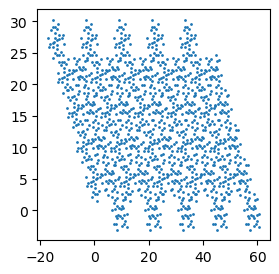

In [68]:
fig, ax = plt.subplots(figsize=(3, 2))

ax.plot(x1, y1,'o',markersize=1)
# plt.axis('off')
# plt.box(False)
plt.savefig('test1.jpg',dpi=100)

fig, ax = plt.subplots(figsize=(3, 3))

ax.plot(x5, y5,'o',markersize=1)
# plt.axis('off')
# plt.box(False)
plt.savefig('test5.jpg',dpi=100)

# Show the plot
plt.show()

In [69]:
from skimage import io

img = io.imread('test1.jpg')
print(img.shape)

img = io.imread('test5.jpg')



(200, 300, 3)


In [38]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 
import matplotlib.pyplot as plt
# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [40]:
print(X_train[0].shape)

(32, 32, 3)


(224,)


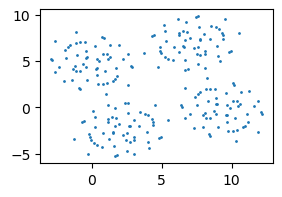

In [70]:
import numpy as np
data1 = np.loadtxt('atom_position_rotate.txt')

x = data1[:,0]
y = data1[:,1]
print(x.shape)
fig, ax = plt.subplots(figsize=(3, 2))

ax.plot(x, y,'o',markersize=1)
plt.savefig('test_rotate.jpg',dpi=100)

from skimage import io

img = io.imread('test_rotate.jpg')/255


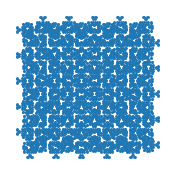

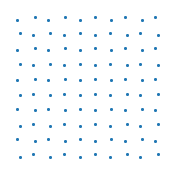

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------
txt = 'txtaaa'
data = np.loadtxt('atom_position_rotate.txt')
x = data[:,0]
y = data[:,1]
fig, ax = plt.subplots(figsize=(2, 2))
ax.plot(x, y,'o',markersize=1)
plt.axis('off')
plt.savefig(txt + '.jpg', dpi = 100)

# -------------------------------------
txt = 'txtbbb'
data = np.loadtxt('com_position_rotate.txt')
x = data[:,0]
y = data[:,1]
fig, ax = plt.subplots(figsize=(2, 2))
ax.plot(x, y,'o',markersize=1)
plt.axis('off')
plt.savefig(txt + '.jpg', dpi = 32)

(64, 64, 3)
(12288,)
(64, 64, 3)


(-0.5, 63.5, 63.5, -0.5)

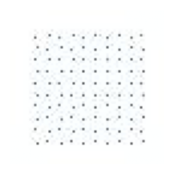

In [52]:
from skimage import io

img = io.imread('txtbbb.jpg')/255
print(img.shape)
img_reshape = img.reshape(img.shape[0]*img.shape[1]*img.shape[2])
print(img_reshape.shape)

img_reverese = img_reshape.reshape(img.shape[0],img.shape[1],img.shape[2])
print(img_reverese.shape)

fig, ax = plt.subplots(figsize=(2,2))
ax.imshow(img_reverese)
ax.axis('off')

In [107]:
from skimage import io
import os

afid = open('atom_data.txt','w')
cfid = open('com_data.txt','w')
    
for ii in range(1,2):
    for jj in range(1,2):
        for kk in range(1,2):
            atomfig = str(ii)+str(jj)+str(kk)+'0'+'.jpg'
            comfig = str(ii)+str(jj)+str(kk)+'1'+'.jpg'

            if os.path.isfile(comfig):
                atomimg = io.imread(atomfig)/255
                comimg = io.imread(comfig)/255

                atomimg_reshape = atomimg.reshape(atomimg.shape[0]*atomimg.shape[1]*atomimg.shape[2])
                comimg_reshape = comimg.reshape(comimg.shape[0]*comimg.shape[1]*comimg.shape[2])
                
                for result in comimg_reshape:
                    cfid.write(str(result) + ' ')
                cfid.write('\n')
                
                for result in atomimg_reshape:
                    afid.write(str(result) + ' ')
                afid.write('\n')
                
afid.close() 
cfid.close()

1110.jpg 1111.jpg


In [108]:
import numpy as np
data = np.loadtxt('com_data.txt')
print(data.shape)
print(type(data))

(480000,)
<class 'numpy.ndarray'>


### Project begins

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.loadtxt('com_data.txt')
print(data.shape)

(8400, 12288)


In [85]:
ss_classes = []
# Y = np.zeros([7*12*100,7*12])
# ct1 = 0
# ct2 = 0
# for ii in range(1,8):
#     for jj in range(1,13):
#         ss_classes.append(str(ii)+str(jj))
#         result = np.zeros([1,7])
#         result[0,ct1] = 1
#         ct1 += 1
#         for kk in range(1,101):
#             Y[ct2] = result
#             ct2 += 1

Y = np.zeros([7*12*100,7])
ct1 = -1
ct2 = 0
for ii in range(1,8):
    ct1 += 1
    for jj in range(1,13):
        ss_classes.append(str(ii)+str(jj))
        result = np.zeros([1,7])
        result[0,ct1] = 1
        for kk in range(1,101):
            Y[ct2] = result
            ct2 += 1

In [86]:
X = data
y = Y
print(X.shape)
print(y.shape)

(8400, 12288)
(8400, 7)


In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [96]:
print(X_train.shape,y_train.shape)

(5880, 12288) (5880, 7)


In [103]:
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x_shape = X_train.shape[1]
y_shape = y_train.shape[1]

### Determine the number of hidden layers

In [104]:
hidden_layers = np.array([x for x in range(3,20)])
units_per_layer = np.array([10])
learning_rates = np.array([0.0001])

accuracy_list = []
loss_list = []
layer_list = []

for hidden_layer in hidden_layers:
    for units in units_per_layer: 
        for learning_rate in learning_rates:
            model = Sequential()
            model.add(Dense(units, activation='relu', input_shape=(x_shape,)))
            for i in range(hidden_layer - 1):
                model.add(Dense(units, activation='relu'))
                
            model.add(Dense(y_shape, activation="softmax"))
            
            opt = optimizers.Adam(learning_rate=learning_rate)
            model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
            history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=30, verbose=0)
            loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
                
            loss_list.append(loss)
            accuracy_list.append(accuracy)
            layer_list.append(hidden_layer)

In [107]:
fid = open('layers.txt','w')
for i in range(len(hidden_layers)):
    fid.write('%d %f %f\n' %(layer_list[i],loss_list[i],accuracy_list[i]))
fid.close()

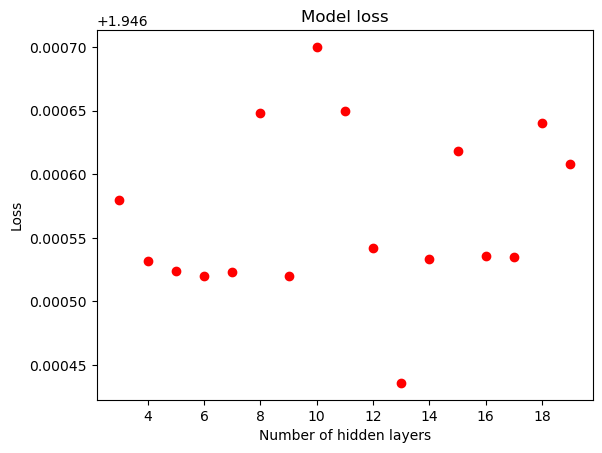

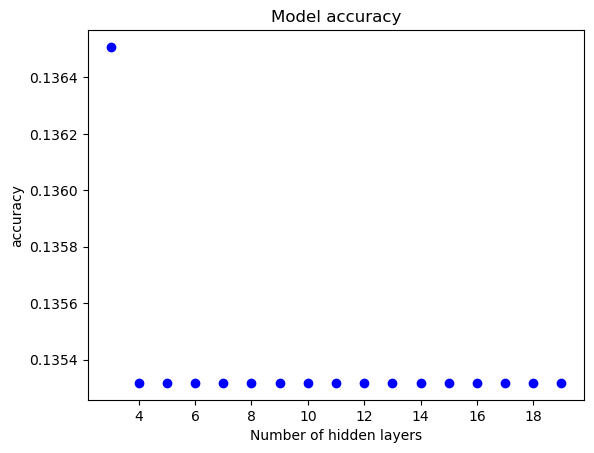

In [108]:
import matplotlib.pyplot as plt
import numpy as np
data = np.loadtxt('layers.txt', delimiter=' ')
layer_list = data[:,0]
loss_list = data[:,1]
accuracy_list = data[:,2]

plt.plot(layer_list,loss_list,'ro')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number of hidden layers') 
plt.savefig('loss_layer.png',dpi=300)
plt.show()

plt.plot(layer_list,accuracy_list,'bo')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Number of hidden layers')
plt.savefig('accuracy_layer.png',dpi=300)
plt.show()

min_loss = min(loss_list)
index = np.where(loss_list == min_loss)
selected_hl = layer_list[index]

### Determine the number of neurons per layer

In [114]:
hidden_layers = np.array([selected_hl])
units_per_layer = np.array([x for x in range(10,100,10)])
learning_rates = np.array([0.001])

accuracy_list = []
loss_list = []
neuron_list = []

for hidden_layer in hidden_layers:
    hidden_layer = int(hidden_layer)
    for units in units_per_layer:  # Question: number of units is equal for each layer?
        for learning_rate in learning_rates:
            model = Sequential()
            model.add(Dense(units, activation='relu', input_shape=(x_shape,)))
            for i in range(hidden_layer - 1):
                model.add(Dense(units, activation='relu'))
                
            model.add(Dense(y_shape, activation="softmax"))
            
            opt = optimizers.Adam(learning_rate=learning_rate)
            model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
            history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=30, verbose=0)
            loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
            
            loss_list.append(loss)
            accuracy_list.append(accuracy)
            neuron_list.append(units)
            
fid = open('neurons.txt','a')
for i in range(len(units_per_layer)):
    fid.write('%d %f %f\n' %(neuron_list[i],loss_list[i],accuracy_list[i]))
fid.close()

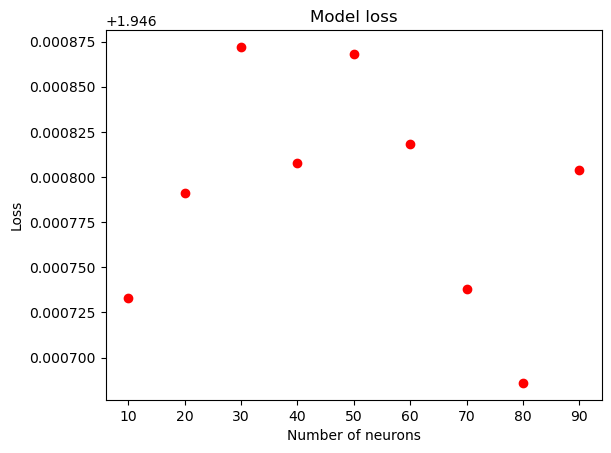

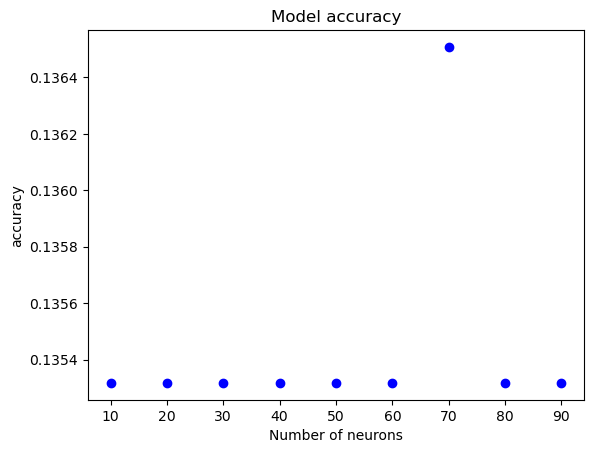

In [116]:
import matplotlib.pyplot as plt
import numpy as np
data = np.loadtxt('neurons.txt', delimiter=' ')
neuron_list = data[:,0]
loss_list = data[:,1]
accuracy_list = data[:,2]

plt.plot(neuron_list,loss_list,'ro')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number of neurons') 
plt.savefig('loss_neurons.png',dpi=300)
plt.show()

plt.plot(neuron_list,accuracy_list,'bo')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Number of neurons')
plt.savefig('accuracy_neurons.png',dpi=300)
plt.show()

min_loss = min(loss_list)
index = np.where(loss_list == min_loss)
selected_num_units = neuron_list[index]

In [117]:
selected_lr = 0.0001
selected_num_units = 80
selected_hl = 5

model = Sequential()
model.add(Dense(selected_num_units, activation='relu', input_shape=(x_shape,)))
for i in range(selected_hl - 1):
    model.add(Dense(selected_num_units, activation='relu'))

model.add(Dense(y_shape, activation='softmax'))
opt = optimizers.Adam(learning_rate = selected_lr)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 100, validation_split=0.3)

Epoch 1/100
129/129 [==============================] - 1s 4ms/step - loss: 1.9556 - accuracy: 0.1443 - val_loss: 1.9459 - val_accuracy: 0.1378
Epoch 2/100
129/129 [==============================] - 0s 3ms/step - loss: 1.9459 - accuracy: 0.1390 - val_loss: 1.9459 - val_accuracy: 0.1417
Epoch 3/100
129/129 [==============================] - 0s 3ms/step - loss: 1.9458 - accuracy: 0.1480 - val_loss: 1.9460 - val_accuracy: 0.1417
Epoch 4/100
129/129 [==============================] - 0s 3ms/step - loss: 1.9458 - accuracy: 0.1480 - val_loss: 1.9460 - val_accuracy: 0.1417
Epoch 5/100
129/129 [==============================] - 0s 3ms/step - loss: 1.9458 - accuracy: 0.1480 - val_loss: 1.9460 - val_accuracy: 0.1417
Epoch 6/100
129/129 [==============================] - 0s 3ms/step - loss: 1.9458 - accuracy: 0.1480 - val_loss: 1.9460 - val_accuracy: 0.1417
Epoch 7/100
129/129 [==============================] - 0s 3ms/step - loss: 1.9457 - accuracy: 0.1480 - val_loss: 1.9460 - val_accuracy: 0.1417

Epoch 58/100
129/129 [==============================] - 0s 3ms/step - loss: 1.9455 - accuracy: 0.1480 - val_loss: 1.9467 - val_accuracy: 0.1417
Epoch 59/100
129/129 [==============================] - 0s 3ms/step - loss: 1.9455 - accuracy: 0.1480 - val_loss: 1.9467 - val_accuracy: 0.1417
Epoch 60/100
129/129 [==============================] - 0s 3ms/step - loss: 1.9455 - accuracy: 0.1480 - val_loss: 1.9467 - val_accuracy: 0.1417
Epoch 61/100
129/129 [==============================] - 0s 3ms/step - loss: 1.9455 - accuracy: 0.1480 - val_loss: 1.9467 - val_accuracy: 0.1417
Epoch 62/100
129/129 [==============================] - 0s 3ms/step - loss: 1.9455 - accuracy: 0.1480 - val_loss: 1.9467 - val_accuracy: 0.1417
Epoch 63/100
129/129 [==============================] - 0s 3ms/step - loss: 1.9455 - accuracy: 0.1480 - val_loss: 1.9467 - val_accuracy: 0.1417
Epoch 64/100
129/129 [==============================] - 0s 4ms/step - loss: 1.9455 - accuracy: 0.1480 - val_loss: 1.9467 - val_accuracy:

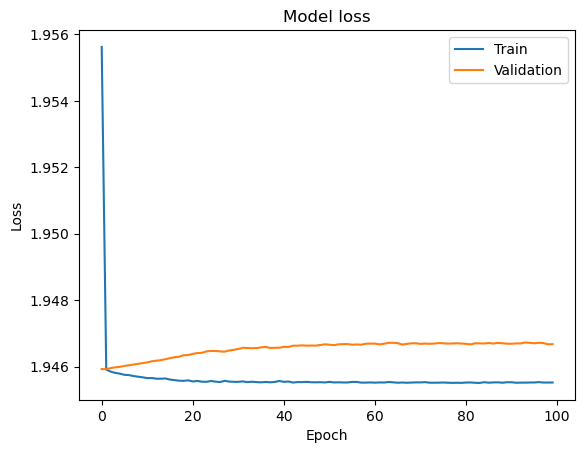

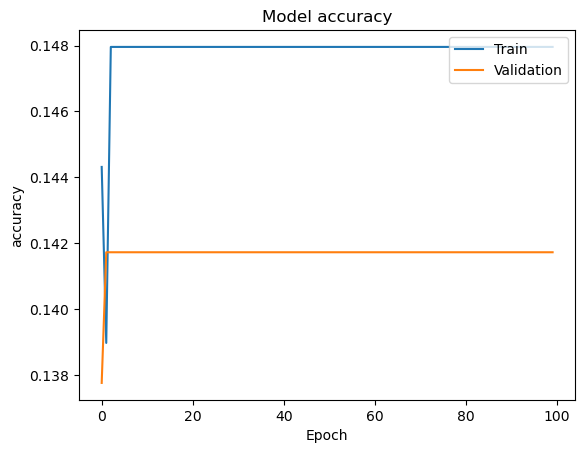

In [118]:
plt.figure(1)
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right') 
plt.savefig('loss.png',dpi=300)
plt.show()

plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right') 
plt.savefig('accuracy.png',dpi=300)
plt.show()

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)